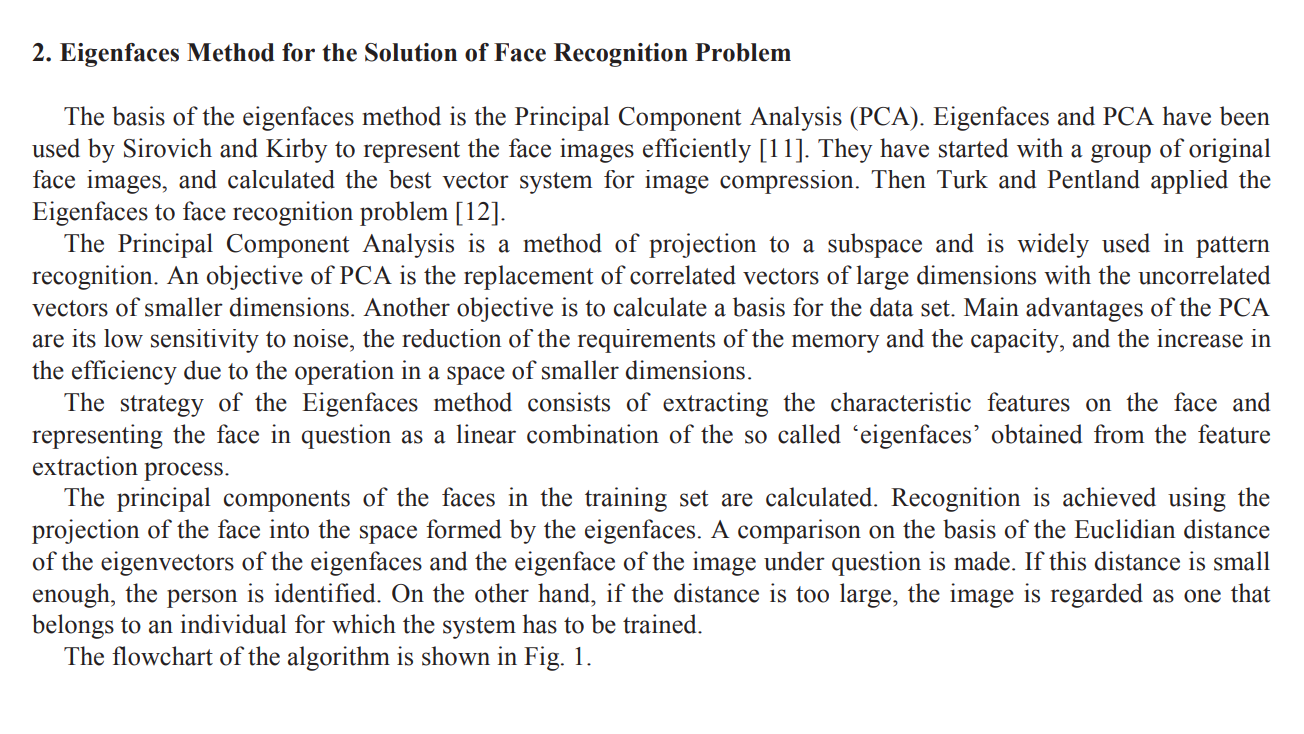

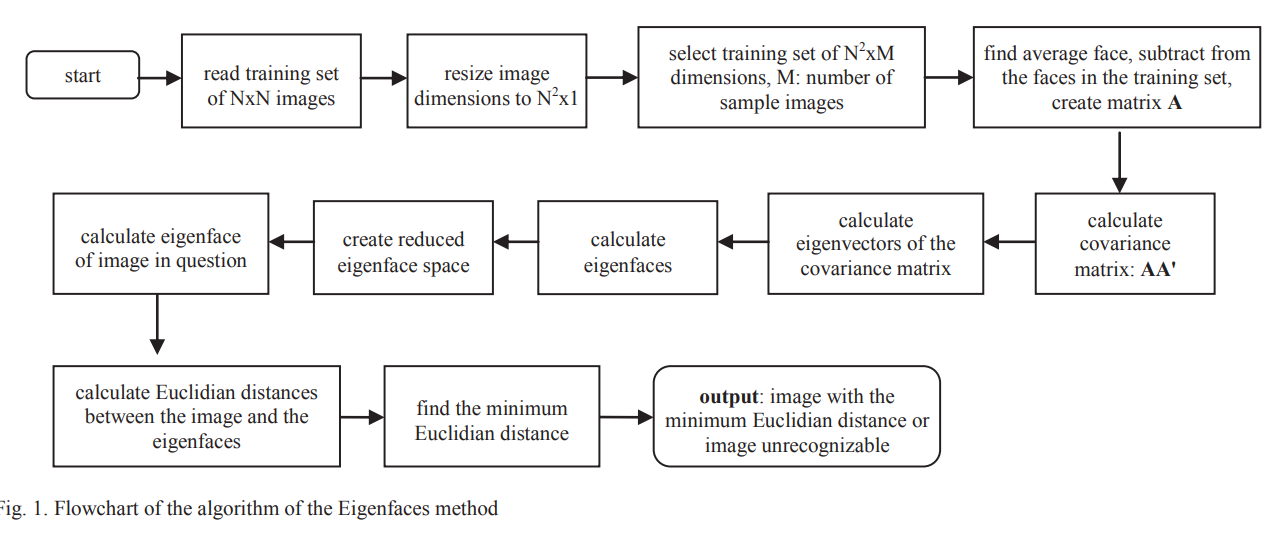

# Start

In [42]:
import numpy as np
import cv2
import os
import random

In [316]:
folder = 'training-data'

In [317]:
name = [0] * len(os.listdir(folder))
for idx, labels in enumerate(os.listdir(folder)):
    name[idx] = labels
def get_label(idx):
    print(idx)
    return name[idx]

In [314]:
name

samig


['abdu',
 'abrish',
 'amha',
 'bisrat',
 'gadi',
 'red',
 'samig',
 'sefi',
 'simon',
 'tg']

# Read training data (NxN) images

In [241]:
# lets have array of avarage eigen faces for the 10 classes
height = 150
width = 150


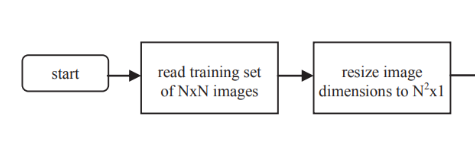

In [252]:
mean_faces = []
def read_images(folder):
    datas = os.listdir(folder)
    Images = []
    Labels = []
    for idx, name in enumerate(datas):
        cur = os.path.join(folder, name)
        mean_face = np.zeros((1, height*width))
        for imgfile in os.listdir(cur):
            img = os.path.join(folder, name, imgfile)
            img = cv2.imread(img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (height, width))
            img = np.array(img).flatten()
            Images.append(img)
            Labels.append(idx)
            mean_face = np.add(mean_face, img)
            
        mean_face = np.divide(mean_face, idx + 1)
        mean_faces.append(mean_face)
    return Images, Labels

In [253]:
Images, Labels = read_images('training-data')

In [254]:
Images

[array([255, 255, 255, ...,  20,  18,  21], dtype=uint8),
 array([254, 254, 253, ...,  16,  16,  16], dtype=uint8),
 array([253, 252, 253, ...,  16,  16,  15], dtype=uint8),
 array([244, 246, 245, ...,  13,  14,  15], dtype=uint8),
 array([238, 238, 240, ...,  50,  52,  64], dtype=uint8),
 array([240, 239, 239, ...,  96, 102,  92], dtype=uint8),
 array([243, 244, 241, ...,  69,  69,  48], dtype=uint8),
 array([243, 240, 243, ...,  48,  52,  38], dtype=uint8),
 array([244, 242, 244, ...,  42,  26,  28], dtype=uint8),
 array([242, 241, 241, ...,  41,  45,  54], dtype=uint8),
 array([236, 236, 236, ...,  39,  34,  42], dtype=uint8),
 array([242, 243, 244, ...,  67,  52,  36], dtype=uint8),
 array([164, 189, 169, ..., 168, 181, 211], dtype=uint8),
 array([173, 157, 174, ..., 137, 152, 164], dtype=uint8),
 array([162, 183, 154, ..., 166, 195, 203], dtype=uint8),
 array([155, 168, 156, ..., 193, 186, 180], dtype=uint8),
 array([253, 254, 254, ..., 117, 154, 132], dtype=uint8),
 array([254, 2

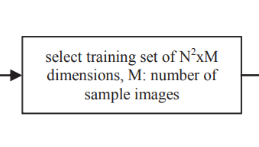

In [258]:
M = np.zeros((len(Images), height*width))

In [264]:
for i in range(len(Images)):
    M[i,:] = Images[i]
M.shape

(44, 22500)

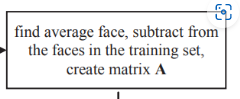

In [265]:
mean_face = np.zeros((1,height*width))

for i in M:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(Images))).flatten()

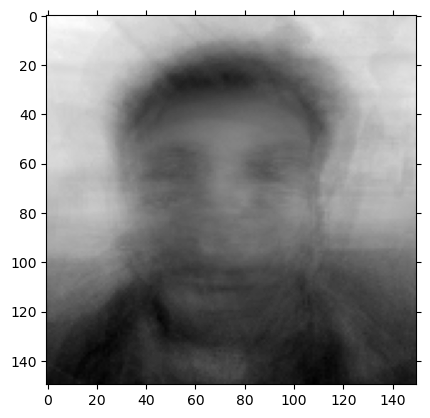

In [266]:
plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [271]:
normalised_training_tensor = np.ndarray(shape=(len(M), height*width))

for i in range(len(M)):
    normalised_training_tensor[i] = np.subtract(M[i],mean_face)

In [292]:
len(normalised_training_tensor)

44

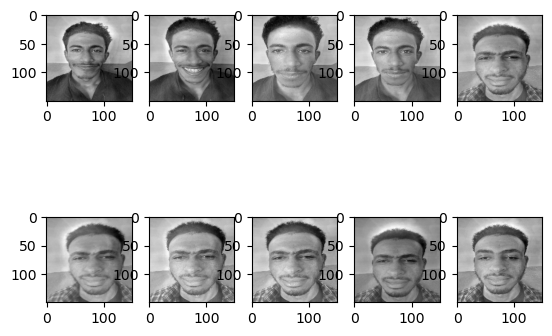

In [293]:
for i in range(10):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,5,1+i)
    plt.imshow(img, cmap='gray')
plt.show()

In [280]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 330.22659959  205.42411674  104.89340391 ... -128.34199962
  -130.67326201 -127.64709188]
 [ 205.42411674  325.27824636  189.93824893 ...  -87.38661499
   -89.01272117  -90.76092126]
 [ 104.89340391  189.93824893  338.78067577 ...  -46.87523968
   -47.58878339  -50.28253841]
 ...
 [-128.34199962  -87.38661499  -46.87523968 ...  267.85708054
   195.65333118  177.77442106]
 [-130.67326201  -89.01272117  -47.58878339 ...  195.65333118
   255.71527667  218.87831505]
 [-127.64709188  -90.76092126  -50.28253841 ...  177.77442106
   218.87831505  251.70717414]]


In [281]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.20076377 -0.07487975 -0.01330196 ...  0.04901927  0.0621999
  -0.00606162]
 [-0.14771745 -0.26866658 -0.08461633 ... -0.02502175 -0.0254228
   0.00900818]
 [-0.08577504 -0.27940864  0.03727207 ...  0.00182195 -0.0059944
  -0.01312325]
 ...
 [ 0.14344009  0.05241629 -0.15126224 ...  0.03978417 -0.01417364
   0.05128754]
 [ 0.14354259  0.05796982 -0.1706058  ... -0.04628725  0.0502671
  -0.12630583]
 [ 0.13993596  0.06466667 -0.15747454 ...  0.02458115 -0.06414376
   0.08268348]]

Eigenvalues of Cov(X): 
[ 4.60222267e+03  1.34287965e+03  1.23350746e+03  9.16630846e+02
  6.83387223e+02  5.46382601e+02  4.40292834e+02  3.73738747e+02
  3.06016592e+02  2.47264009e+02  1.98266842e+02  1.93222091e+02
  1.63275127e+02  1.45342157e+02  1.28054727e+02  1.17888915e+02
  1.10440218e+02  1.06385782e+02  1.02865593e+02 -1.17344470e-13
  9.35347558e+01  9.01122182e+01  8.46968604e+01  8.02163037e+01
  8.05248303e+00  7.46877507e+01  7.18939934e+01  6.46804400e+01
  6.283

In [282]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.3502487  0.45244755 0.5463227  0.61608221 0.66809088 0.70967291
 0.74318107 0.77162418 0.79491334 0.81373118 0.82882013 0.84352515
 0.85595108 0.86701224 0.87675775 0.8857296  0.89413456 0.90223097
 0.91005948 0.91717788 0.9240358  0.93048159 0.93658639 0.94227045
 0.94774188 0.95266434 0.95744663 0.96182202 0.96594868 0.96985868
 0.97352784 0.97689079 0.98002385 0.98294909 0.9854979  0.98787119
 0.99006052 0.99211439 0.99410501 0.99604756 0.99783183 0.99938717
 1.         1.        ]


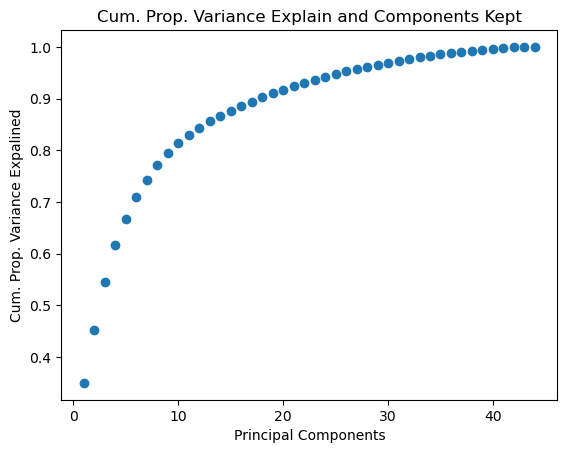

In [283]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [346]:
reduced_data = np.array(eigvectors_sort[:7]).transpose()
reduced_data.shape

(44, 7)

In [347]:
proj_data = np.dot(M.transpose(),reduced_data)
proj_data = proj_data.transpose()

In [348]:
proj_data.shape

(7, 22500)

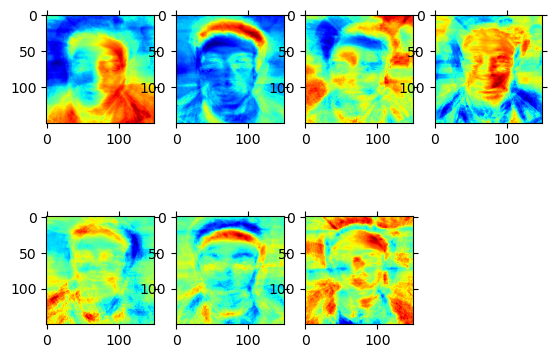

In [349]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [288]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[-1.69231959e+08, -1.73971196e+07, -2.41565899e+06,
         9.10777974e+06, -2.92817000e+07, -4.59390961e+06,
        -9.43260922e+05],
       [-1.10837357e+08, -6.77030882e+07, -2.09041905e+07,
         3.42196074e+07, -1.89281329e+07,  1.49721385e+07,
         2.32674857e+06],
       [-5.14520171e+07, -7.22360163e+07,  4.67425170e+06,
         5.28755656e+07, -6.14876848e+06,  3.66857454e+07,
        -1.03669044e+07],
       [-1.03220512e+08, -7.15971317e+07,  6.45555885e+06,
         3.13176013e+07, -1.58199947e+07,  2.31097352e+07,
        -2.01569427e+05],
       [-1.15703285e+08, -1.30587134e+07,  8.35128761e+06,
        -3.21613787e+07,  1.16523289e+07, -2.91657958e+07,
         3.84918950e+06],
       [-9.96856830e+07, -3.17561664e+07, -2.07784617e+07,
        -3.31037808e+07,  2.33048269e+07, -2.07676406e+07,
         3.98986643e+06],
       [-9.27201767e+07, -5.36595924e+07, -1.43844348e+07,
        -2.98338428e+07,  1.72104388e+07, -1.26348029e+07,
         1.0868525

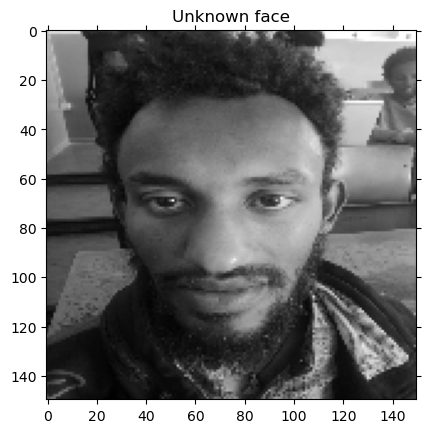

In [374]:
unknown_face = plt.imread('testing-data/gadi/4.jpg')
unknown_face = cv2.resize(unknown_face, (height, width))
unknown_face = cv2.cvtColor(unknown_face, cv2.COLOR_BGR2GRAY)
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

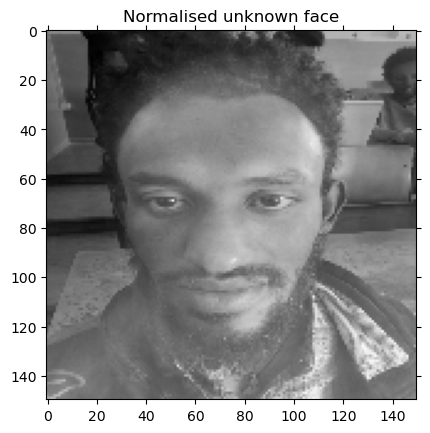

In [375]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [376]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([-1.44337428e+08,  1.55116706e+07,  6.18066005e+07, -1.40955082e+08,
       -2.13213743e+07, -9.50011188e+06, -1.35799238e+07])

In [380]:
def pridict(arr):
    relate = 0
    distance = float('inf')
    for i in range(len(arr)):
        if arr[i] < distance:
            distance = arr[i]
            relate = i
        print(arr[i])
    return get_label(Labels[relate])
    

In [381]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)

pridict(norms)

169095269.61321163
215480483.1808591
243998865.51408887
208069236.70369723
134564109.79358694
158453068.94721696
166415929.52711916
164494585.14624363
110764405.18303552
128051521.95203179
200237988.11743104
155842946.60323563
344179548.57355046
371957767.74673045
366197595.84482473
348857001.4943107
64143701.15927543
64474565.56369244
167575204.86641935
96417214.73186809
441211227.64734304
465193415.29334885
466322197.18949765
231640621.97055936
208868032.09147245
231256996.32786152
155655061.0699456
143403773.3199621
145677849.90222928
142839087.7561909
144488610.38649216
147310840.13017285
141760417.75178218
296205941.0989791
289995258.94188124
319734839.86169136
318110053.6151605
363806251.8466974
384119605.2827511
390319600.9163806
359912161.4130664
387077900.7819912
399566022.7006943
395558708.79572713
3


'bisrat'

In [ ]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face = plt.imread('Dataset/'+img)
    num_images  += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))